# Fashion MNIST Classification with TensorFlow

This project demonstrates a simple neural network implementation using TensorFlow, showcasing image classification on the Fashion MNIST dataset.

## Introduction

In this project, I will:
- Load and preprocess data
- Build and train a neural network model
- Evaluate the model
- Visualize the results

### 1 - Data Preparation




In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

 - So we must normalize the input data by dividing over 255.0 so the Input pixels will be ranged between [0,1]

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

 - Let's see the (i) image in the train data by plotting it with matplotlib module !

>> 0


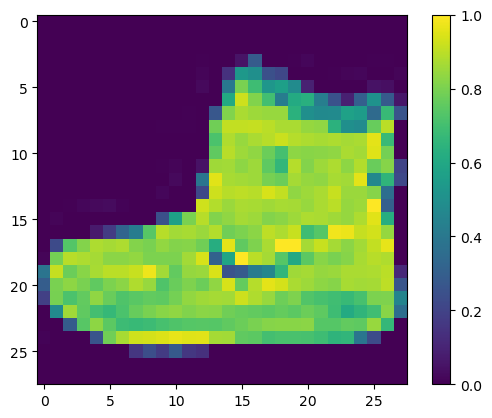

In [30]:
i = int(input(">> "))
plt.figure()
plt.imshow(train_images[i])
plt.colorbar()
plt.grid(False)
plt.show()

 - Each image has its own label so we will store them in ```class_names``` list

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

 - Displaying the first 25 images with their class names : 

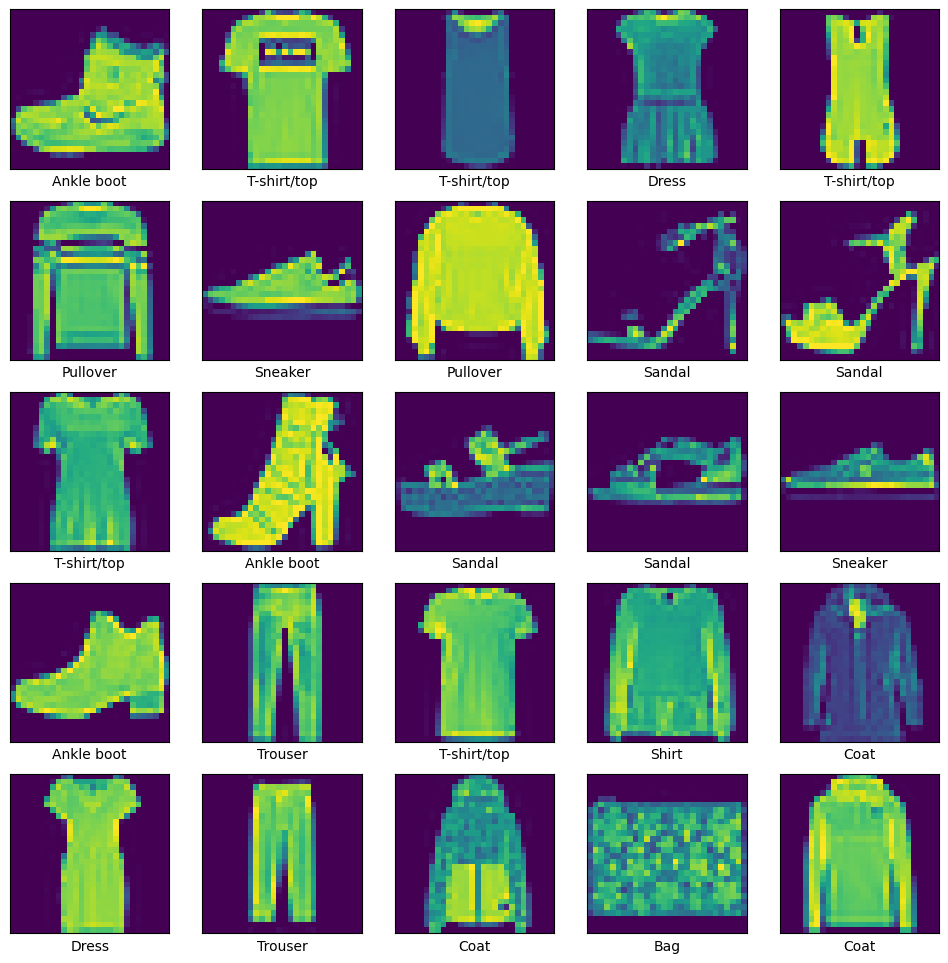

In [7]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 2 - Model Training 

 - Build The Neural Network model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

 - compile the model

In [12]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

 - Train the model

In [13]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7800 - loss: 0.6234
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8644 - loss: 0.3783
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8795 - loss: 0.3360
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8847 - loss: 0.3116
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8904 - loss: 0.2941
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8968 - loss: 0.2799
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9018 - loss: 0.2648
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9053 - loss: 0.2513
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9106 - loss: 0.2408
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9127 - loss: 0.2353
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9149 - loss: 0.2275
Epoch 12/20
1875/1875 ━━━━━━━━

### 3 - Model Evaluation

 - Evaluate the model on the test data

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("The Test loss : ", test_loss)
print("The Test accuracy : ", test_accuracy)

313/313 - 1s - 3ms/step - accuracy: 0.8814 - loss: 0.3560
The Test loss :  0.35598739981651306
The Test accuracy :  0.8813999891281128


 - After we created the layers wil will add a softmax layer to the model for probability predections

In [15]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 - Testing the 1st image on the test data

In [16]:
predictions[0]

array([7.8672917e-09, 1.5943243e-13, 3.7411965e-08, 2.5483583e-14,
       1.2793616e-09, 2.8376289e-06, 5.8599475e-10, 4.6137208e-04,
       1.4813858e-11, 9.9953580e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

 - In here I wanted just to make sure that the model predicted well on the 1st image test, in the predictions array it shows the probability of the class labels which range between [0,9], the ```np.argmax(predictions[0])``` gives the index of highest probability of the class labels which is 9 and to ensure ```test_labels[0] ``` gives the appropriate class label for the test image 

### 4 - Visualization Functions

 - In this section I will display the test images with their True label and the predicted label and how close the predicted label to its true label with an barchart showing the evaluation :)

In [27]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i] , img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% {}".format(class_names[predicted_label],
                                      100 * np.max(predictions_array),
                                      class_names[true_label]),
                                        color = color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks()
    
    the_barchart = plt.bar(range(10), predictions_array, color = '#283338')
    plt.ylim([0,1])
    
    predicted_label = np.argmax(predictions_array)
    
    the_barchart[predicted_label].set_color('red')
    the_barchart[true_label].set_color('blue')
    

### 5 - Displaying Predictions

 - Now we will implement the two functions above to display the first image and its prediction 

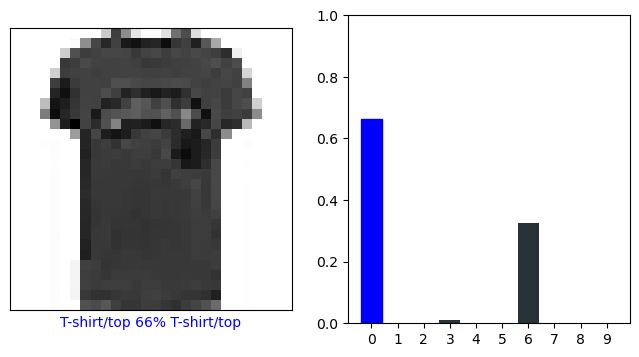

In [28]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

### 6 - Displaying a Grid of Predictions

 - Plot the first X test images, their predicted labels, and the true labels, Color correct predictions in blue and incorrect predictions in red. By using ```for``` loop, I will suppose X = 20 images 

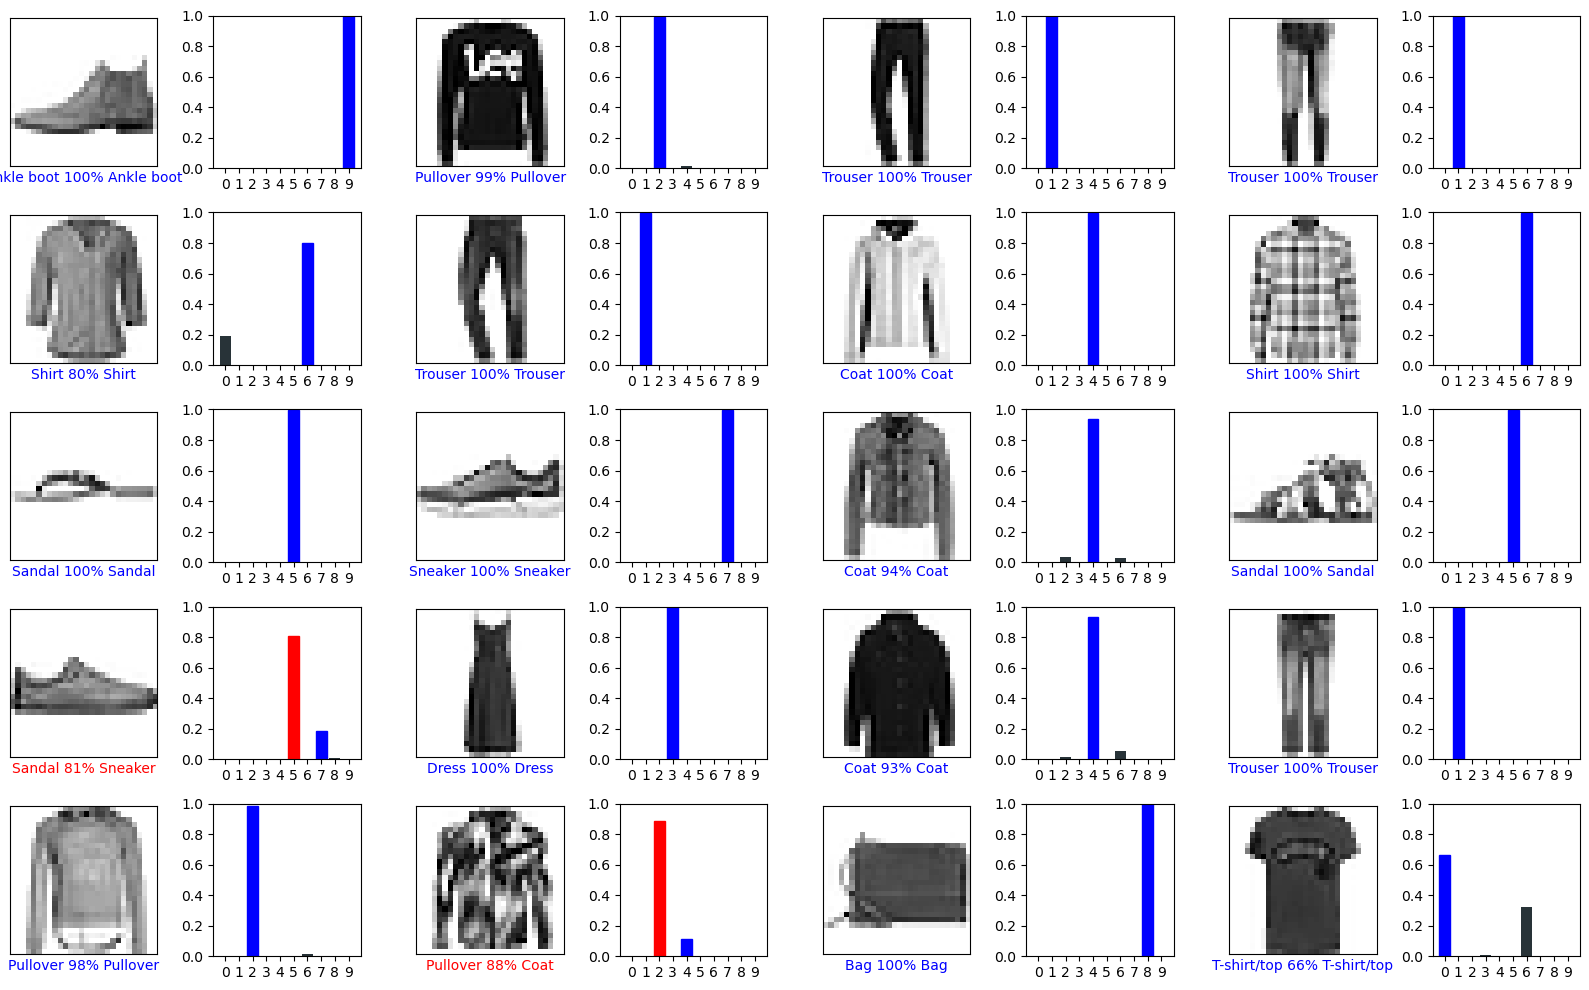

In [29]:
rows = 5
cols = 4
num_images = 20
plt.figure(figsize=(2*2*cols, 2*rows))
for i in range(num_images):
    plt.subplot(rows, 2 * cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(rows, 2 * cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Conclusion

In this project,I successfully built and trained a neural network using TensorFlow to classify images from the Fashion MNIST dataset. The model achieved an accuracy of `0.8813999891281128` on the test set.

Thank you for viewing my project!

Done and Made by : Yousef Sorour  
linkedIn : www.linkedin.com/in/yousef-sorour-b55205291

Hope you enjoyed <3